<a href="https://colab.research.google.com/github/indahdesri/AI-Counting-Fruit-Fly/blob/main/Detection_Counting_Fruit_Fly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt comet_ml

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-390-g0797106a Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (8 CPUs, 51.0 GB RAM, 32.8/235.7 GB disk)


**DATASET**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import zipfile
local_zip = '/content/drive/MyDrive/IEEE_LalatBuah/train_dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/lalat')
zip_ref.close()

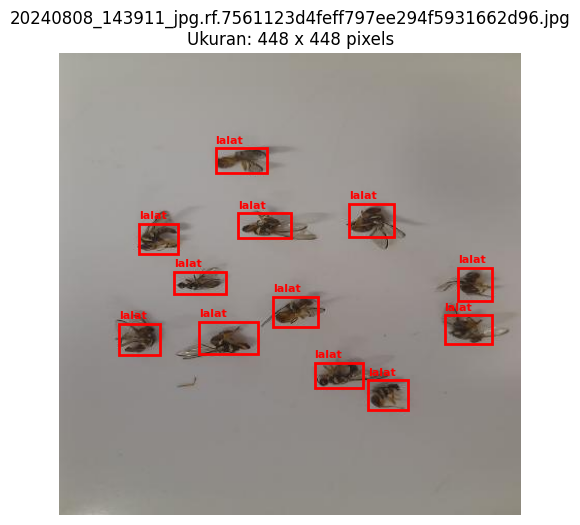

In [ ]:
import os
import random
import cv2
from matplotlib import pyplot as plt

dataset_path = '/content/lalat'
image_folder = os.path.join(dataset_path, 'images')
label_folder = os.path.join(dataset_path, 'labels')

def read_label_file(label_path):
    annotations = []
    with open(label_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            elements = line.strip().split()
            class_id = "0" if elements[0] == "0" else "lalat"
            bbox = list(map(float, elements[1:]))
            annotations.append((class_id, bbox))
    return annotations

def display_image_with_size_and_labels(image_folder, label_folder):
    image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
    if not image_files:
        print("Tidak ada gambar dalam folder.")
        return

    random_image = random.choice(image_files)
    image_path = os.path.join(image_folder, random_image)
    label_path = os.path.join(label_folder, random_image.replace('.jpg', '.txt').replace('.png', '.txt'))

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape

    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis('off')

    if os.path.exists(label_path):
        annotations = read_label_file(label_path)
        for annotation in annotations:
            class_id, bbox = annotation
            x_center, y_center, box_width, box_height = bbox
            x1 = int((x_center - box_width / 2) * w)
            y1 = int((y_center - box_height / 2) * h)
            x2 = int((x_center + box_width / 2) * w)
            y2 = int((y_center + box_height / 2) * h)
            rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='red', facecolor='none')
            plt.gca().add_patch(rect)
            plt.text(x1, y1 - 5, class_id, color='red', fontsize=8, weight='bold')

    plt.title(f"{random_image}\nUkuran: {w} x {h} pixels")
    plt.show()

display_image_with_size_and_labels(image_folder, label_folder)

In [ ]:
import os

def count_labels_in_txt(dataset_directory):
    label_count = {0: 0, 1: 0}  # Initialize the count for label 0 and label 1

    # Loop through each .txt file in the directory
    for filename in os.listdir(dataset_directory):
        if filename.endswith(".txt"):
            txt_file_path = os.path.join(dataset_directory, filename)

            # Open the .txt file and read its contents
            with open(txt_file_path, "r") as file:
                # Read each line in the file (each line represents one annotation)
                for line in file:
                    # The first number in each line is the label
                    label = int(line.split()[0])

                    # Increment the count for the corresponding label
                    if label in label_count:
                        label_count[label] += 1

    return label_count

# Example usage
dataset_directory = "/content/lalat/labels"  # Replace with your dataset folder path
label_counts = count_labels_in_txt(dataset_directory)
print(f"Label 0 count: {label_counts[0]}")
print(f"Label 1 count: {label_counts[1]}")


Label 0 count: 5241
Label 1 count: 141891


In [ ]:
import os
import zipfile
local_zip = '/content/drive/MyDrive/IEEE_LalatBuah/test2.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/testlalat2')
zip_ref.close()

**PREPROCESSING**

RESIZE

In [ ]:
import os
import cv2

def resize_images_in_dataset(dataset_path, new_size=(448, 448)):
    image_folder = os.path.join(dataset_path, 'images')
    if not os.path.exists(image_folder):
        print(f"Folder gambar tidak ditemukan: {image_folder}")
        return
    image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

    print(f"Memproses {len(image_files)} gambar di folder {image_folder}...")

    for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)

        image = cv2.imread(image_path)
        if image is None:
            print(f"Gambar tidak valid atau gagal dibaca: {image_file}")
            continue


        resized_image = cv2.resize(image, new_size, interpolation=cv2.INTER_LINEAR)
        cv2.imwrite(image_path, resized_image)

        print(f"Ubah ukuran gambar: {image_file} -> {new_size}")

dataset_path = '/content/lalat'


resize_images_in_dataset(dataset_path, new_size=(448, 448))

Streaming output truncated to the last 5000 lines.
Berhasil mengubah ukuran gambar: IMG_0594_JPG.rf.e8199564b8d452af1572ff29b7f4698c.jpg -> (448, 448)
Berhasil mengubah ukuran gambar: 20240713_110749_jpg.rf.40d53e9a3393b67080b578a92681bc65.jpg -> (448, 448)
Berhasil mengubah ukuran gambar: DSC00435_JPG.rf.9688bb212db5e68b049c01ae0a8b07f5.jpg -> (448, 448)
Berhasil mengubah ukuran gambar: IMG_1064_JPG.rf.a942efb697b852eac2a88396439d57b7.jpg -> (448, 448)
Berhasil mengubah ukuran gambar: DSC00467_JPG.rf.78774043445bdf162993286c7b7583b5.jpg -> (448, 448)
Berhasil mengubah ukuran gambar: DSC00547_JPG.rf.3167171c1805f9bbc6014f13011b7eb3.jpg -> (448, 448)
Berhasil mengubah ukuran gambar: 20240712_105428_jpg.rf.ff78806c828578b55ec464cd48fb198b.jpg -> (448, 448)
Berhasil mengubah ukuran gambar: 20240716_113343_jpg.rf.4c4ed18dcbc6b289fd6805e5347ec51b.jpg -> (448, 448)
Berhasil mengubah ukuran gambar: 20240715_142120_jpg.rf.94226f74a5431d13762b3b1c6e77edca.jpg -> (448, 448)
Berhasil mengubah uku

In [ ]:
#CHECKING IMAGE RANDOM

import os
import random
import cv2

def check_random_image_size(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

    if not image_files:
        print("Tidak ada file gambar di folder.")
        return

    random_image = random.choice(image_files)
    image_path = os.path.join(folder_path, random_image)

    image = cv2.imread(image_path)
    if image is None:
        print(f"Gambar tidak valid atau gagal dibaca: {random_image}")
        return

    height, width, channels = image.shape
    print(f"Gambar yang dipilih: {random_image}")
    print(f"Dimensi gambar: {width}x{height} (width x height)")
    print(f"Jumlah channel: {channels}")

folder_path = '/content/lalat/images'  # Ganti dengan path folder Anda

check_random_image_size(folder_path)


Gambar yang dipilih: IMG_1837_JPG.rf.a195a1efc28673d79a1d02acabc5988d.jpg
Dimensi gambar: 448x448 (width x height)
Jumlah channel: 3


DISPLAY RANDOM IMAGE

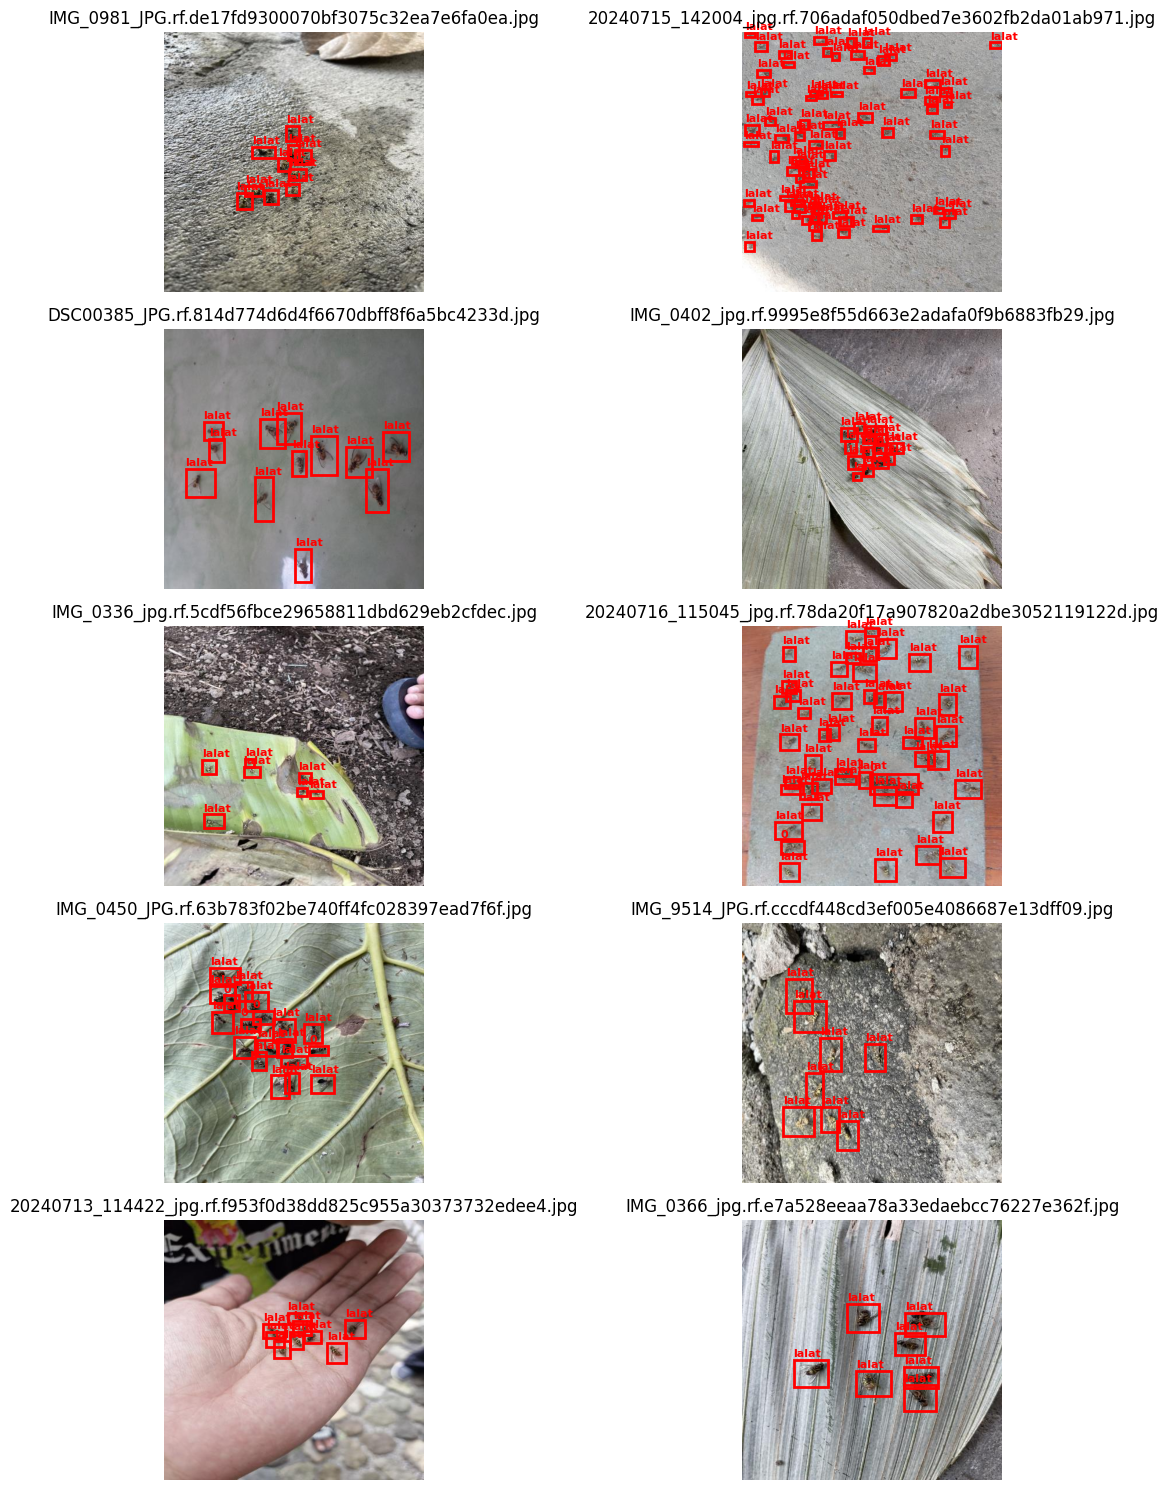

In [ ]:
import os
import random
import cv2
from matplotlib import pyplot as plt


dataset_path = '/content/lalat'
image_folder = os.path.join(dataset_path, 'images')
label_folder = os.path.join(dataset_path, 'labels')

def read_label_file(label_path, class_names):
    annotations = []
    with open(label_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            elements = line.strip().split()
            class_id = int(elements[0])
            bbox = list(map(float, elements[1:]))
            annotations.append((class_names[class_id], bbox))
    return annotations

def display_random_images(image_folder, label_folder, class_names, num_images=10):
    image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]


    random_images = random.sample(image_files, min(num_images, len(image_files)))

    plt.figure(figsize=(15, 15))

    for i, random_image in enumerate(random_images, start=1):
        image_path = os.path.join(image_folder, random_image)


        label_file = os.path.join(label_folder, random_image.replace('.jpg', '.txt').replace('.png', '.txt'))
        if not os.path.exists(label_file):
            print(f"Label file tidak ditemukan untuk gambar {random_image}")
            continue


        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Konversi BGR ke RGB
        annotations = read_label_file(label_file, class_names)


        ax = plt.subplot(5, 2, i)
        plt.imshow(image)
        h, w, _ = image.shape

        for annotation in annotations:
            class_name, bbox = annotation
            x_center, y_center, box_width, box_height = bbox
            x1 = int((x_center - box_width / 2) * w)
            y1 = int((y_center - box_height / 2) * h)
            x2 = int((x_center + box_width / 2) * w)
            y2 = int((y_center + box_height / 2) * h)


            rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='red', facecolor='none')
            ax.add_patch(rect)
            plt.text(x1, y1 - 5, class_name, color='red', fontsize=8, weight='bold')

        plt.axis('off')
        plt.title(random_image)

    plt.tight_layout()
    plt.show()


class_names = ["0", "lalat"]


display_random_images(image_folder, label_folder, class_names, num_images=10)


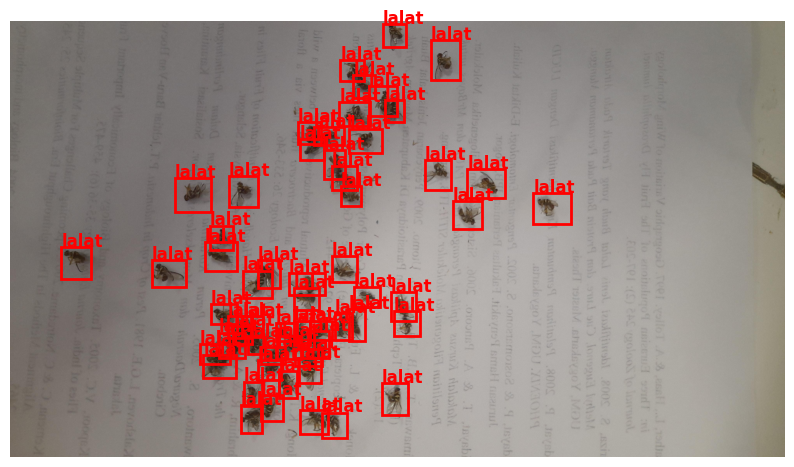

In [ ]:
import os
import random
import cv2
from matplotlib import pyplot as plt


dataset_path = '/content/dataset/train'
image_folder = os.path.join(dataset_path, 'images')
label_folder = os.path.join(dataset_path, 'labels')

def read_label_file(label_path, class_names):

    annotations = []
    with open(label_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            elements = line.strip().split()
            class_id = int(elements[0])
            bbox = list(map(float, elements[1:]))
            annotations.append((class_names[class_id], bbox))
    return annotations

def display_random_image(image_folder, label_folder, class_names):
    image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]


    random_image = random.choice(image_files)
    image_path = os.path.join(image_folder, random_image)


    label_file = os.path.join(label_folder, random_image.replace('.jpg', '.txt').replace('.png', '.txt'))
    if not os.path.exists(label_file):
        print(f"Label file tidak ditemukan untuk gambar {random_image}")
        return


    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    annotations = read_label_file(label_file, class_names)


    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    ax = plt.gca()
    h, w, _ = image.shape

    for annotation in annotations:
        class_name, bbox = annotation
        x_center, y_center, box_width, box_height = bbox
        x1 = int((x_center - box_width / 2) * w)
        y1 = int((y_center - box_height / 2) * h)
        x2 = int((x_center + box_width / 2) * w)
        y2 = int((y_center + box_height / 2) * h)

        # Gambar kotak pembatas (bounding box)
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        plt.text(x1, y1 - 5, class_name, color='red', fontsize=12, weight='bold')

    plt.axis('off')
    plt.show()


class_names = ["0", "lalat"]


display_random_image(image_folder, label_folder, class_names)


SPLITTING DATASET

In [ ]:
import os
import shutil
import random

def split_dataset(image_dir, label_dir, train_image_dir, train_label_dir, val_image_dir, val_label_dir, test_image_dir, test_label_dir, train_ratio=0.8, val_ratio=0.1):

    os.makedirs(train_image_dir, exist_ok=True)
    os.makedirs(train_label_dir, exist_ok=True)
    os.makedirs(val_image_dir, exist_ok=True)
    os.makedirs(val_label_dir, exist_ok=True)
    os.makedirs(test_image_dir, exist_ok=True)
    os.makedirs(test_label_dir, exist_ok=True)


    image_files = [f for f in os.listdir(image_dir) if f.endswith(".jpg")]


    random.shuffle(image_files)

    # Calculate split sizes
    total_count = len(image_files)
    train_count = int(total_count * train_ratio)
    val_count = int(total_count * val_ratio)
    test_count = total_count - train_count - val_count


    for i, image_file in enumerate(image_files):
        image_path = os.path.join(image_dir, image_file)
        label_path = os.path.join(label_dir, image_file.replace(".jpg", ".txt"))

        if i < train_count:
            dest_image_dir = train_image_dir
            dest_label_dir = train_label_dir
        elif i < train_count + val_count:
            dest_image_dir = val_image_dir
            dest_label_dir = val_label_dir
        else:
            dest_image_dir = test_image_dir
            dest_label_dir = test_label_dir


        shutil.copy(image_path, os.path.join(dest_image_dir, image_file))

        if os.path.exists(label_path):
            shutil.copy(label_path, os.path.join(dest_label_dir, image_file.replace(".jpg", ".txt")))

    print(f"Dataset split: {train_count} training images, {val_count} validation images, and {test_count} test images.")


output_image_dir = "/content/lalat/images"
output_label_dir = "/content/lalat/labels"

train_image_dir = "/content/dataset/train/images"
train_label_dir = "/content/dataset/train/labels"
val_image_dir = "/content/dataset/val/images"
val_label_dir = "/content/dataset/val/labels"
test_image_dir = "/content/dataset/test/images"
test_label_dir = "/content/dataset/test/labels"

split_dataset(output_image_dir, output_label_dir, train_image_dir, train_label_dir, val_image_dir, val_label_dir, test_image_dir, test_label_dir, train_ratio=0.8, val_ratio=0.1)

Dataset split: 4806 training images, 600 validation images, and 602 test images.


Gambar yang dipilih: 20240715_151831_jpg.rf.def37cc91f903deec7443c2b9331234e.jpg
Dimensi gambar: 448x448 (width x height)
Jumlah channel: 3


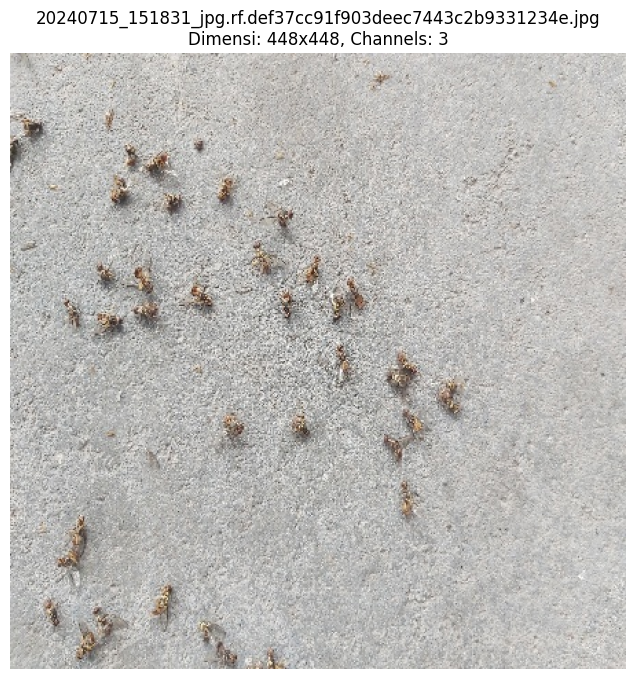

In [ ]:


import os
import random
import cv2
from matplotlib import pyplot as plt

def check_random_image_size(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

    if not image_files:
        print("Tidak ada file gambar di folder.")
        return


    random_image = random.choice(image_files)
    image_path = os.path.join(folder_path, random_image)


    image = cv2.imread(image_path)
    if image is None:
        print(f"Gambar tidak valid atau gagal dibaca: {random_image}")
        return


    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


    height, width, channels = image.shape
    print(f"Gambar yang dipilih: {random_image}")
    print(f"Dimensi gambar: {width}x{height} (width x height)")
    print(f"Jumlah channel: {channels}")


    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb)
    plt.title(f"{random_image}\nDimensi: {width}x{height}, Channels: {channels}")
    plt.axis('off')
    plt.show()


folder_path = '/content/dataset/train/images'


check_random_image_size(folder_path)


FILTER LABEL

In [ ]:
import os


def filter_labels(label_dir):
    for filename in os.listdir(label_dir):
        if filename.endswith(".txt"):
            filepath = os.path.join(label_dir, filename)

            with open(filepath, 'r') as file:
                lines = file.readlines()

            filtered_lines = [line for line in lines if line.startswith("1 ")]


            with open(filepath, 'w') as file:
                file.writelines(filtered_lines)


dataset_path = "/content/dataset"


label_dirs = [
    os.path.join(dataset_path, "train", "labels"),
    os.path.join(dataset_path, "val", "labels"),
    os.path.join(dataset_path, "test", "labels"),
]


for label_dir in label_dirs:
    if os.path.exists(label_dir):
        print(f"Filtering labels in: {label_dir}")
        filter_labels(label_dir)
    else:
        print(f"Directory not found: {label_dir}")

print("Filtering complete!")


REWRITE LABEL -> CHANGE IDCLASS

In [ ]:
import os


def update_class_ids(label_dir):
    for filename in os.listdir(label_dir):
        if filename.endswith(".txt"):
            filepath = os.path.join(label_dir, filename)

            with open(filepath, 'r') as file:
                lines = file.readlines()


            updated_lines = []
            for line in lines:
                parts = line.split()
                if parts[0] == '1':
                    parts[0] = '0'
                    updated_lines.append(' '.join(parts) + '\n')


            if updated_lines:
                with open(filepath, 'w') as file:
                    file.writelines(updated_lines)


dataset_path = "/content/dataset"


label_dirs = [
    os.path.join(dataset_path, "train", "labels"),
    os.path.join(dataset_path, "val", "labels"),
    os.path.join(dataset_path, "test", "labels"),
]


for label_dir in label_dirs:
    if os.path.exists(label_dir):
        print(f"Updating class IDs in: {label_dir}")
        update_class_ids(label_dir)
    else:
        print(f"Directory not found: {label_dir}")

print("Class ID update complete!")


**TRAINING**

SKEMA LABEL 0 DAN 1

In [ ]:
!python /content/yolov5/train.py --batch 16 --epochs 100 --data /content/yolov5/data/data.yaml --weights yolov5s.pt --patience 10

Streaming output truncated to the last 5000 lines.
      59/99       4.4G    0.05359     0.1178   0.002752        446        640:   2% 6/301 [00:01<01:02,  4.74it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      59/99       4.4G     0.0539     0.1185   0.002586        499        640:   2% 7/301 [00:01<01:01,  4.76it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      59/99       4.4G    0.05426     0.1219   0.003052        602        640:   3% 8/301 [00:01<01:02,  4.67it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      59/99       4.4G    0.05453    

In [ ]:
!python /content/yolov5/train.py --batch 16 --epochs 100 --data /content/yolov5/data/data.yaml --hyp /content/yolov5/data/hyp.yaml --weights yolov5s.pt --optimizer "Adam" --patience 10

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      92/99      4.41G    0.05688     0.1394   0.003432        448        640:   2% 5/301 [00:01<01:04,  4.59it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      92/99      4.41G    0.05588     0.1335   0.003653        427        640:   2% 6/301 [00:01<01:04,  4.61it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      92/99      4.41G    0.05616     0.1338   0.003483        568        640:   2% 7/301 [00:01<01:05,  4.51it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):


SKEMA LABEL 1

In [ ]:
!python /content/yolov5/train.py --batch 16 --epochs 100 --data /content/yolov5/data/data.yaml --weights yolov5s.pt --patience 10 --save txt

Streaming output truncated to the last 5000 lines.
      66/99      4.37G    0.05484     0.1296          0        617        640:   2% 5/301 [00:01<01:03,  4.68it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      66/99      4.37G    0.05477     0.1262          0        401        640:   2% 6/301 [00:01<01:02,  4.76it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      66/99      4.37G    0.05507      0.125          0        569        640:   2% 7/301 [00:01<01:01,  4.81it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      66/99      4.37G    0.05509    

In [ ]:
!python /content/yolov5/train.py --batch 16 --epochs 300 --data /content/yolov5/data/data.yaml --weights yolov5s.pt --patience 10

**VALIDASI**

INTERNAL

In [ ]:
!python val.py --data /content/yolov5/data/data.yaml --weights /content/best.pt

val: data=/content/yolov5/data/data.yaml, weights=['/content/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/dataset/val/labels... 600 images, 9 backgrounds, 0 corrupt: 100% 600/600 [00:00<00:00, 4396.87it/s]
val: New cache created: /content/dataset/val/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 19/19 [00:14<00:00,  1.32it/s]
                   all        600      14593      0.636      0.549      0.587       0.24
                     0        600        430      0.546      0.386 

In [ ]:
!python val.py --data /content/yolov5/data/data.yaml --weights /content/best.pt

val: data=/content/yolov5/data/data.yaml, weights=['/content/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/dataset/val/labels... 600 images, 5 backgrounds, 0 corrupt: 100% 600/600 [00:00<00:00, 4859.27it/s]
val: WARNING ⚠️ /content/dataset/val/images/20240715_152228_jpg.rf.10083b33b5333d642b881f0524f3451a.jpg: 1 duplicate labels removed
val: New cache created: /content/dataset/val/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 19/19 [00:14<00:00,  1.28it/s]
                   all  

In [ ]:
!python val.py --data /content/yolov5/data/data.yaml --weights /content/best.pt --task test

val: data=/content/yolov5/data/data.yaml, weights=['/content/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/dataset/test/labels... 602 images, 7 backgrounds, 0 corrupt: 100% 602/602 [00:00<00:00, 6528.49it/s]
test: New cache created: /content/dataset/test/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 19/19 [00:13<00:00,  1.41it/s]
                   all        602      14297      0.694      0.628      0.672      0.271
                     0        602        596      0.648       

In [ ]:
!python val.py --data /content/yolov5/data/data.yaml --weights /content/best.pt --task test

val: data=/content/yolov5/data/data.yaml, weights=['/content/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/dataset/test/labels... 602 images, 5 backgrounds, 0 corrupt: 100% 602/602 [00:00<00:00, 4973.46it/s]
test: New cache created: /content/dataset/test/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 19/19 [00:13<00:00,  1.46it/s]
                   all        602      15733      0.655      0.582      0.619      0.249
                     0        602        484      0.612      0

**TESTING**

EKSTERNAL

In [ ]:
!python val.py --data /content/yolov5/data/data.yaml --weights /content/best.pt --task test

val: data=/content/yolov5/data/data.yaml, weights=['/content/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/dataset/testlalat/labels... 191 images, 0 backgrounds, 0 corrupt: 100% 191/191 [00:00<00:00, 5268.36it/s]
test: New cache created: /content/dataset/testlalat/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 6/6 [00:06<00:00,  1.01s/it]
                   all        191       3687      0.338      0.347      0.347      0.114
                     0        191         33          

In [ ]:
!python val.py --data /content/yolov5/data/data.yaml --weights /content/best.pt --task test

val: data=/content/yolov5/data/data.yaml, weights=['/content/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/dataset/testlalat/labels... 222 images, 0 backgrounds, 0 corrupt: 100% 222/222 [00:00<00:00, 3220.27it/s]
test: New cache created: /content/dataset/testlalat/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 7/7 [00:07<00:00,  1.06s/it]
                   all        222       5325      0.421      0.365      0.343      0.113
                     0        222        215      0.22

**DETEKSI OBJECT**

In [ ]:
!python detect.py --weights /content/yolov5/best.pt --conf 0.25 --source... --save-txt

detect: weights=['/content/yolov5/best.pt'], source=/content/DSC00567.JPG, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/DSC00567.JPG: 480x640 11 lalats, 26.8ms
Speed: 0.5ms pre-process, 26.8ms inference, 525.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp10
1 labels saved to runs/detect/exp10/labels


In [ ]:
!python detect.py --weights /content/best.pt --conf 0.25 --source /content/dataset/test/images --save-txt

detect: weights=['/content/best.pt'], source=/content/dataset/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/602 /content/dataset/test/images/20240312_093607_jpg.rf.b20e35f06f817edfc131c9d59cecceb6.jpg: 640x640 21 lalats, 11.4ms
image 2/602 /content/dataset/test/images/20240312_094813_jpg.rf.4b0d580d9980b64bc828e657ffa9b31e.jpg: 640x640 15 lalats, 11.5ms
image 3/602 /content/d

In [ ]:
!python detect.py --weights /content/best.pt --conf 0.25 --source /content/testlalat2 --save-txt

detect: weights=['/content/best.pt'], source=/content/testlalat2, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-390-g0797106a Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/20 /content/testlalat2/20240312_094647_jpg.rf.1fc8a98bb0599651f01369a14d01e69c.jpg: 640x640 21 lalats, 11.4ms
image 2/20 /content/testlalat2/20240712_105122_jpg.rf.71409dd147544d264315c7332ef2b8af.jpg: 640x640 1 0, 43 lalats, 11.5ms
image 3/20 /content/testlalat2/20240712_153500

PER FILE IMAGE (FILTER LABEL)

In [ ]:
import os
import cv2

image_path = "/content/yolov5/runs/detect/exp10/DSC00567.JPG"
label_folder = "/content/yolov5/runs/detect/exp10/labels"
output_image_path = "/content/output2.jpg"

output_folder = os.path.dirname(output_image_path)
os.makedirs(output_folder, exist_ok=True)

image_name = os.path.basename(image_path).split(".")[0]
label_file = os.path.join(label_folder, f"{image_name}.txt")

num_objects = 0
if os.path.exists(label_file):
    with open(label_file, "r") as f:
        lines = f.readlines()
        num_objects = sum(1 for line in lines if line.strip().split()[0] == '1')
else:
    raise FileNotFoundError(f"File label tidak ditemukan: {label_file}")

image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Gambar tidak ditemukan: {image_path}")

target_size = 448
image_resized = cv2.resize(image, (target_size, target_size))

text = f"Jumlah lalat: {num_objects}"
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
font_color = (255, 255, 255)
thickness = 2

text_size = cv2.getTextSize(text, font, font_scale, thickness)[0]
text_x = (image_resized.shape[1] - text_size[0]) // 2
text_y = 3

border_size = 40
border_color = (0, 0, 0)
image_with_border = cv2.copyMakeBorder(
    image_resized,
    top=border_size, bottom=border_size,
    left=border_size, right=border_size,
    borderType=cv2.BORDER_CONSTANT,
    value=border_color
)


text_x = (image_with_border.shape[1] - text_size[0]) // 2
text_y = border_size // 2 + text_size[1] // 2


cv2.putText(image_with_border, text, (text_x, text_y), font, font_scale, font_color, thickness)


success = cv2.imwrite(output_image_path, image_with_border)
if success:
    print(f"Hasil: {output_image_path}")
else:
    print("Gagal menyimpan gambar. Periksa format atau path output.")

Gambar dengan teks dan bingkai disimpan di: /content/output2.jpg


PER FILE IMAGE (NON FILTER LABEL)

In [ ]:
import os
import cv2


image_path = "/content/yolov5/runs/detect/exp8/IMG_0434.JPG"
label_folder = "/content/yolov5/runs/detect/exp8/labels"
output_image_path = "/content/output2.jpg"


output_folder = os.path.dirname(output_image_path)
os.makedirs(output_folder, exist_ok=True)


image_name = os.path.basename(image_path).split(".")[0]
label_file = os.path.join(label_folder, f"{image_name}.txt")


num_objects = 0
if os.path.exists(label_file):
    with open(label_file, "r") as f:
        lines = f.readlines()

        num_objects = len(lines)
else:
    raise FileNotFoundError(f"File label tidak ditemukan: {label_file}")


image = cv2.imread(image_path)
if image is None:
    raise ValueError(f"Gambar tidak ditemukan: {image_path}")


target_size = 448
image_resized = cv2.resize(image, (target_size, target_size))


text = f"Jumlah Lalat: {num_objects}"
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
font_color = (255, 255, 255)
thickness = 2


text_size = cv2.getTextSize(text, font, font_scale, thickness)[0]
text_x = (image_resized.shape[1] - text_size[0]) // 2
text_y = 3  # Posisi vertikal teks


border_size = 40
border_color = (0, 0, 0)
image_with_border = cv2.copyMakeBorder(
    image_resized,
    top=border_size, bottom=border_size,
    left=border_size, right=border_size,
    borderType=cv2.BORDER_CONSTANT,
    value=border_color
)


text_x = (image_with_border.shape[1] - text_size[0]) // 2
text_y = border_size // 2 + text_size[1] // 2


cv2.putText(image_with_border, text, (text_x, text_y), font, font_scale, font_color, thickness)


success = cv2.imwrite(output_image_path, image_with_border)
if success:
    print(f"Hasil: {output_image_path}")
else:
    print("Gagal menyimpan gambar. Periksa format atau path output.")


Gambar dengan teks dan bingkai disimpan di: /content/output2.jpg


PER FOLDER IMAGE (FILTER LABEL)

In [ ]:
import os
import cv2

# Path ke folder gambar input dan folder label
image_folder = "/content/yolov5/runs/detect/exp3"
label_folder = "/content/yolov5/runs/detect/exp3/labels"
output_folder = "/content/outputstestApp"


os.makedirs(output_folder, exist_ok=True)


for image_file in os.listdir(image_folder):
    if image_file.endswith((".jpg", ".png", ".jpeg")):
        image_path = os.path.join(image_folder, image_file)


        image_name = os.path.splitext(image_file)[0]
        label_file = os.path.join(label_folder, f"{image_name}.txt")
        output_image_path = os.path.join(output_folder, f"{image_name}_output.jpg")


        num_objects = 0
        if os.path.exists(label_file):
            with open(label_file, "r") as f:
                lines = f.readlines()
                num_objects = sum(1 for line in lines if line.strip().split()[0] == '1')
        else:
            print(f"File label tidak ditemukan: {label_file}")
            continue


        image = cv2.imread(image_path)
        if image is None:
            print(f"Gambar tidak ditemukan: {image_path}")
            continue


        target_size = 448
        image_resized = cv2.resize(image, (target_size, target_size))


        text = f"Jumlah lalat: {num_objects}"
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.5
        font_color = (255, 255, 255)  # Warna putih
        thickness = 2


        text_size = cv2.getTextSize(text, font, font_scale, thickness)[0]
        text_x = (image_resized.shape[1] - text_size[0]) // 2
        text_y = 3


        border_size = 40
        border_color = (0, 0, 0)
        image_with_border = cv2.copyMakeBorder(
            image_resized,
            top=border_size, bottom=border_size,
            left=border_size, right=border_size,
            borderType=cv2.BORDER_CONSTANT,
            value=border_color
        )


        text_x = (image_with_border.shape[1] - text_size[0]) // 2
        text_y = border_size // 2 + text_size[1] // 2


        cv2.putText(image_with_border, text, (text_x, text_y), font, font_scale, font_color, thickness)


        success = cv2.imwrite(output_image_path, image_with_border)
        if success:
            print(f"Hasil: {output_image_path}")
        else:
            print(f"Gagal menyimpan gambar: {output_image_path}")


Gambar dengan teks dan bingkai disimpan di: /content/outputstestApp/20240712_153500_jpg.rf.b650e3557f57566b2bb80f04342ec1b1_output.jpg
Gambar dengan teks dan bingkai disimpan di: /content/outputstestApp/test-275-_jpg.rf.80368438c72408ecf717ae5cf9088bed_output.jpg
Gambar dengan teks dan bingkai disimpan di: /content/outputstestApp/test-289-_jpg.rf.a384864db65fb21228d1df0247ac73d1_output.jpg
Gambar dengan teks dan bingkai disimpan di: /content/outputstestApp/test-165-_jpg.rf.e5206995b4724b84d7c2255a251faf43_output.jpg
Gambar dengan teks dan bingkai disimpan di: /content/outputstestApp/20240808_143337_jpg.rf.bbc7c445595bd3ebb87a5c8b1717a268_output.jpg
Gambar dengan teks dan bingkai disimpan di: /content/outputstestApp/test-135-_jpg.rf.77e4233c64a7d37e01c1c3daac7ea733_output.jpg
Gambar dengan teks dan bingkai disimpan di: /content/outputstestApp/20240713_110954_jpg.rf.a5be1d30666afe14fbfca4b4345901b3_output.jpg
Gambar dengan teks dan bingkai disimpan di: /content/outputstestApp/test-235-_j

In [ ]:
import os
import cv2

# Path ke folder gambar input dan folder label
image_folder = "/content/yolov5/runs/detect/exp"  # Path folder gambar input
label_folder = "/content/yolov5/runs/detect/exp/labels"  # Path folder label
output_folder = "/content/outputs_eksternal"  # Folder untuk output gambar final

# Pastikan folder output tersedia
os.makedirs(output_folder, exist_ok=True)

# Iterasi melalui semua file gambar dalam folder input
for image_file in os.listdir(image_folder):
    if image_file.endswith((".jpg", ".png", ".jpeg")):  # Filter hanya file gambar
        image_path = os.path.join(image_folder, image_file)

        # Ambil nama file gambar tanpa ekstensi
        image_name = os.path.splitext(image_file)[0]
        label_file = os.path.join(label_folder, f"{image_name}.txt")
        output_image_path = os.path.join(output_folder, f"{image_name}_output.jpg")

        # Baca jumlah objek kelas 1 dari file label
        num_objects = 0
        if os.path.exists(label_file):
            with open(label_file, "r") as f:
                lines = f.readlines()
                # Hitung hanya kelas 1 (kelas = 1)
                num_objects = sum(1 for line in lines if line.strip().split()[0] == '1')
        else:
            print(f"File label tidak ditemukan: {label_file}")
            continue

        # Baca gambar menggunakan OpenCV
        image = cv2.imread(image_path)
        if image is None:
            print(f"Gambar tidak ditemukan: {image_path}")
            continue

        # Resize gambar ke 448x448
        target_size = 448
        image_resized = cv2.resize(image, (target_size, target_size))

        # Tambahkan teks jumlah objek kelas 1 di bagian atas gambar
        text = f"Jumlah lalat: {num_objects}"
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.5
        font_color = (255, 255, 255)  # Warna putih
        thickness = 2

        # Tentukan posisi teks
        text_size = cv2.getTextSize(text, font, font_scale, thickness)[0]
        text_x = (image_resized.shape[1] - text_size[0]) // 2  # Tengah secara horizontal
        text_y = 3  # Posisi vertikal teks

        # Tambahkan padding (bingkai hitam) di sekitar gambar
        border_size = 40  # Ukuran bingkai hitam
        border_color = (0, 0, 0)  # Warna hitam
        image_with_border = cv2.copyMakeBorder(
            image_resized,
            top=border_size, bottom=border_size,
            left=border_size, right=border_size,
            borderType=cv2.BORDER_CONSTANT,
            value=border_color
        )

        # Tentukan posisi teks pada border hitam bagian atas
        text_x = (image_with_border.shape[1] - text_size[0]) // 2  # Tengah secara horizontal
        text_y = border_size // 2 + text_size[1] // 2  # Tengah di dalam border atas

        # Tambahkan teks pada gambar dengan border
        cv2.putText(image_with_border, text, (text_x, text_y), font, font_scale, font_color, thickness)

        # Simpan gambar akhir
        success = cv2.imwrite(output_image_path, image_with_border)
        if success:
            print(f"Gambar dengan teks dan bingkai disimpan di: {output_image_path}")
        else:
            print(f"Gagal menyimpan gambar: {output_image_path}")


Gambar dengan teks dan bingkai disimpan di: /content/outputs_eksternal/IMG_20240716_113923_jpg.rf.91cc863e4bf969b58e4ffb33382be198_output.jpg
Gambar dengan teks dan bingkai disimpan di: /content/outputs_eksternal/IMG_0579_JPG.rf.0dff03ff98c920cbf0fe8ca40eea2d43_output.jpg
Gambar dengan teks dan bingkai disimpan di: /content/outputs_eksternal/20240715_142907_jpg.rf.d3204b15f885bf1a069cccddb458fe34_output.jpg
Gambar dengan teks dan bingkai disimpan di: /content/outputs_eksternal/20240712_105846_jpg.rf.5f8a01d2e802383a654f2f47d0dc17ad_output.jpg
Gambar dengan teks dan bingkai disimpan di: /content/outputs_eksternal/20240715_152426_jpg.rf.4a71adda2493cac9845775f733a47d2a_output.jpg
Gambar dengan teks dan bingkai disimpan di: /content/outputs_eksternal/20240715_135231_jpg.rf.f543bd676ddea4eb3113d1f4d9b21043_output.jpg
Gambar dengan teks dan bingkai disimpan di: /content/outputs_eksternal/IMG_20240712_105610_jpg.rf.511d951af3653414b59887b0890bdf0e_output.jpg
Gambar dengan teks dan bingkai di

PER FOLDER IMAGE (NON FILTER LABEL)

In [ ]:
import os
import cv2


image_folder = "/content/yolov5/runs/detect/exp4"
label_folder = "/content/yolov5/runs/detect/exp4/labels"
output_folder = "/content/output2"


os.makedirs(output_folder, exist_ok=True)

for image_file in os.listdir(image_folder):
    if image_file.endswith((".jpg", ".png", ".jpeg")):
        image_path = os.path.join(image_folder, image_file)


        image_name = os.path.splitext(image_file)[0]
        label_file = os.path.join(label_folder, f"{image_name}.txt")
        output_image_path = os.path.join(output_folder, f"{image_name}_output.jpg")


        class_counts = {}

        if os.path.exists(label_file):
            with open(label_file, "r") as f:
                lines = f.readlines()
                for line in lines:
                    class_id = line.strip().split()[0]
                    class_counts[class_id] = class_counts.get(class_id, 0) + 1
        else:
            print(f"File label tidak ditemukan: {label_file}")
            continue


        image = cv2.imread(image_path)
        if image is None:
            print(f"Gambar tidak ditemukan: {image_path}")
            continue


        target_size = 448
        image_resized = cv2.resize(image, (target_size, target_size))


        text_lines = [f"Jumlah Lalat: {v}" for k, v in class_counts.items()]
        text = " | ".join(text_lines) if text_lines else "Tidak ada objek terdeteksi"

        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.5
        font_color = (255, 255, 255)
        thickness = 2


        text_size = cv2.getTextSize(text, font, font_scale, thickness)[0]


        border_size = 40
        border_color = (0, 0, 0)
        image_with_border = cv2.copyMakeBorder(
            image_resized,
            top=border_size, bottom=border_size,
            left=border_size, right=border_size,
            borderType=cv2.BORDER_CONSTANT,
            value=border_color
        )


        text_x = (image_with_border.shape[1] - text_size[0]) // 2
        text_y = border_size // 2 + text_size[1] // 2


        cv2.putText(image_with_border, text, (text_x, text_y), font, font_scale, font_color, thickness)


        success = cv2.imwrite(output_image_path, image_with_border)
        if success:
            print(f"Hasil: {output_image_path}")
        else:
            print(f"Gagal menyimpan gambar: {output_image_path}")


Gambar dengan teks dan bingkai disimpan di: /content/output2/test (116)_output.jpg
Gambar dengan teks dan bingkai disimpan di: /content/output2/test (137)_output.jpg
Gambar dengan teks dan bingkai disimpan di: /content/output2/test (54)_output.jpg
Gambar dengan teks dan bingkai disimpan di: /content/output2/test (107)_output.jpg
Gambar dengan teks dan bingkai disimpan di: /content/output2/test (34)_output.jpg
Gambar dengan teks dan bingkai disimpan di: /content/output2/test (295)_output.jpg
Gambar dengan teks dan bingkai disimpan di: /content/output2/test (115)_output.jpg
Gambar dengan teks dan bingkai disimpan di: /content/output2/test (101)_output.jpg
Gambar dengan teks dan bingkai disimpan di: /content/output2/test (132)_output.jpg
File label tidak ditemukan: /content/yolov5/runs/detect/exp4/labels/test (213).txt
Gambar dengan teks dan bingkai disimpan di: /content/output2/test (35)_output.jpg
Gambar dengan teks dan bingkai disimpan di: /content/output2/test (98)_output.jpg
File lab

**METRIC EVALUASI COUNTING**

MENGHITUNG AC

In [ ]:
import os
import csv


txt_results_path = "/content/yolov5/runs/detect/exp4/labels"


def count_labels_per_file(results_path, target_class=1):
    results = []


    if not os.path.exists(results_path):
        return results


    all_files = {os.path.splitext(f)[0] for f in os.listdir(results_path)}
    txt_files = {os.path.splitext(f)[0] for f in os.listdir(results_path) if f.endswith(".txt")}


    for file_name in all_files:
        if file_name in txt_files:
            file_path = os.path.join(results_path, file_name + ".txt")
            count = 0
            with open(file_path, "r") as file:
                for line in file:
                    class_id = int(line.split()[0])
                    if class_id == target_class:
                        count += 1
            results.append((file_name + ".txt", count))
        else:
            results.append((file_name + ".txt", 0))

    return results


label_counts = count_labels_per_file(txt_results_path, target_class=1)


csv_file = "/content/detection_eskternal.csv"
file_exists = os.path.isfile(csv_file)

with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)


    writer.writerow(["File", "Total_Label_1"])


    for txt_file, count in label_counts:
        writer.writerow([txt_file, count])

print(f"Hasil perhitungan disimpan ke file: {csv_file}")


Hasil perhitungan disimpan ke file: /content/detection_eskternal.csv


In [ ]:
import os
import csv


txt_results_path = "/content/dataset/test/labels"


def count_labels_per_file(results_path):
    results = []


    if not os.path.exists(results_path):
        return results


    all_files = {os.path.splitext(f)[0] for f in os.listdir(results_path)}
    txt_files = {os.path.splitext(f)[0] for f in os.listdir(results_path) if f.endswith(".txt")}


    for file_name in all_files:
        if file_name in txt_files:
            file_path = os.path.join(results_path, file_name + ".txt")
            count = 0
            with open(file_path, "r") as file:
                for line in file:
                    count += 1  # Hitung setiap baris sebagai satu label
            results.append((file_name + ".txt", count))
        else:
            results.append((file_name + ".txt", 0))

    return results


label_counts = count_labels_per_file(txt_results_path)


csv_file = "/content/hc_eksternal.csv"
file_exists = os.path.isfile(csv_file)

with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)


    writer.writerow(["File", "Total_Labels"])


    for txt_file, count in label_counts:
        writer.writerow([txt_file, count])

print(f"Hasil perhitungan disimpan ke file: {csv_file}")


Hasil perhitungan disimpan ke file: /content/hc_eksternal.csv


In [ ]:
import os


txt_results_path = "/content/yolov5/runs/detect/exp4/labels"

def count_detections_by_class(results_path, target_class=1):
    total_detections = 0

    for txt_file in os.listdir(results_path):
        if txt_file.endswith(".txt"):
            file_path = os.path.join(results_path, txt_file)
            with open(file_path, "r") as file:
                for line in file:
                    class_id = int(line.split()[0])
                    if class_id == target_class:
                        total_detections += 1

    return total_detections

total_label_1 = count_detections_by_class(txt_results_path, target_class=1)
print(f"Total Lalat: {total_label_1}")


Total Lalat: 4396


In [ ]:
import os

txt_results_path = "/content/yolov5/runs/detect/exp4/labels"

def count_all_detections(results_path):
    total_detections = 0

    for txt_file in os.listdir(results_path):
        if txt_file.endswith(".txt"):
            file_path = os.path.join(results_path, txt_file)
            with open(file_path, "r") as file:
                for line in file:
                    total_detections += 1

    return total_detections

total_detections = count_all_detections(txt_results_path)
print(f"Total Lalat: {total_detections}")


Total Lalat: 7858


In [ ]:
def calculate_metrics():
    import numpy as np

    N = int(input("Jumlah sampel (N): "))

    total_HC = int(input("Total HC (Human Count): "))
    total_AC = int(input("Total AC (Algorithm Count): "))

    EM = 0.05 * total_HC

    CE = max(0, total_AC - total_HC)

    ADA = total_AC / (total_HC + EM)

    AP = total_AC / (total_HC + EM + CE)

    F1_score = (2 * AP * ADA) / (AP + ADA)

    MAE = abs(total_HC - total_AC) / N

    print("\nHasil Perhitungan:")
    print(f"Average Detection Accuracy (ADA): {ADA:.2%}")
    print(f"Average Precision (AP): {AP:.2%}")
    print(f"F1-Score: {F1_score:.2f}")
    print(f"Mean Absolute Error (MAE): {MAE:.2f}")

calculate_metrics()


Jumlah sampel (N): 539
Total HC (Human Count): 14327
Total AC (Algorithm Count): 13185

Hasil Perhitungan:
Average Detection Accuracy (ADA): 87.65%
Average Precision (AP): 87.65%
F1-Score: 0.88
Mean Absolute Error (MAE): 2.12


In [ ]:
def calculate_metrics():
    import numpy as np

    N = int(input("Jumlah sampel (N): "))

    total_HC = int(input("Total HC (Human Count): "))
    total_AC = int(input("Total AC (Algorithm Count): "))

    EM = 0.05 * total_HC

    CE = max(0, total_AC - total_HC)

    ADA = total_AC / (total_HC + EM)

    AP = total_AC / (total_HC + EM + CE)

    F1_score = (2 * AP * ADA) / (AP + ADA)

    MAE = abs(total_HC - total_AC) / N

    print("\nHasil Perhitungan:")
    print(f"Average Detection Accuracy (ADA): {ADA:.2%}")
    print(f"Average Precision (AP): {AP:.2%}")
    print(f"F1-Score: {F1_score:.2f}")
    print(f"Mean Absolute Error (MAE): {MAE:.2f}")

calculate_metrics()


Jumlah sampel (N): 222
Total HC (Human Count): 5325
Total AC (Algorithm Count): 3944

Hasil Perhitungan:
Average Detection Accuracy (ADA): 70.54%
Average Precision (AP): 70.54%
F1-Score: 0.71
Mean Absolute Error (MAE): 6.22


In [ ]:
def calculate_metrics():
    import numpy as np
    import csv
    import os

    # Input data
    N = int(input("Jumlah sampel (N): "))
    total_HC = int(input("Total HC (Human Count): "))
    total_AC = int(input("Total AC (Algorithm Count): "))

    # Perhitungan
    EM = 0.05 * total_HC
    CE = max(0, total_AC - total_HC)
    ADA = total_AC / (total_HC + EM)
    AP = total_AC / (total_HC + EM + CE)
    F1_score = (2 * AP * ADA) / (AP + ADA)
    MAE = abs(total_HC - total_AC) / N

    # Tampilkan hasil
    print("\nHasil Perhitungan:")
    print(f"Average Detection Accuracy (ADA): {ADA:.2%}")
    print(f"Average Precision (AP): {AP:.2%}")
    print(f"F1-Score: {F1_score:.2f}")
    print(f"Mean Absolute Error (MAE): {MAE:.2f}")

    # Data untuk disimpan
    result = {
        'Foto Ke- N': N,
        'Total_HC': total_HC,
        'Total_AC': total_AC,
        'ADA': f"{ADA:.2%}",
        'AP': f"{AP:.2%}",
        'F1_Score': round(F1_score, 2),
        'MAE': round(MAE, 2)
    }

    # Nama file CSV
    csv_file = 'metrics_results.csv'

    # Periksa apakah file sudah ada
    file_exists = os.path.isfile(csv_file)

    # Simpan ke CSV
    with open(csv_file, mode='a', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=result.keys())

        # Tulis header jika file baru dibuat
        if not file_exists:
            writer.writeheader()

        # Tulis data
        writer.writerow(result)

    print(f"\nHasil disimpan ke file: {csv_file}")

calculate_metrics()

KeyboardInterrupt: Interrupted by user

**HAPUS FOLDER**

In [ ]:
import shutil
import os

def delete_folder(folder_path):
    """
    Menghapus folder beserta seluruh isinya.

    Args:
    - folder_path (str): Path ke folder yang ingin dihapus.

    Returns:
    - None
    """
    if os.path.exists(folder_path):
        shutil.rmtree(folder_path)
        print(f"Folder '{folder_path}' berhasil dihapus.")
    else:
        print(f"Folder '{folder_path}' tidak ditemukan.")

# Contoh penggunaan
folder_path = "/content/yolov5/runs/train/exp10"  # Ganti dengan path folder yang ingin dihapus
delete_folder(folder_path)


Folder '/content/yolov5/runs/train/exp10' berhasil dihapus.


**DOWLOAD FOLDER**

In [ ]:
!zip -r /content/OutTestApp.zip /content/outputstestApp

  adding: content/outputstestApp/ (stored 0%)
  adding: content/outputstestApp/test-135-_jpg.rf.77e4233c64a7d37e01c1c3daac7ea733_output.jpg (deflated 2%)
  adding: content/outputstestApp/test-40-_jpg.rf.8523f1304d7afe4b1917b9955c217aa3_output.jpg (deflated 3%)
  adding: content/outputstestApp/20240712_105122_jpg.rf.71409dd147544d264315c7332ef2b8af_output.jpg (deflated 3%)
  adding: content/outputstestApp/test-275-_jpg.rf.80368438c72408ecf717ae5cf9088bed_output.jpg (deflated 4%)
  adding: content/outputstestApp/20240808_145125_jpg.rf.26e047aee96b59b5c150efdd4b5d3cfe_output.jpg (deflated 4%)
  adding: content/outputstestApp/test-11-_jpg.rf.4277704fb88a3411047f7ea46f5075f2_output.jpg (deflated 2%)
  adding: content/outputstestApp/test-235-_jpg.rf.76ed6af96f0ac7d15777f149fc46b2a0_output.jpg (deflated 3%)
  adding: content/outputstestApp/test-289-_jpg.rf.a384864db65fb21228d1df0247ac73d1_output.jpg (deflated 4%)
  adding: content/outputstestApp/test-5-_jpg.rf.5a403eecbcf77a029bfda6782d869d3b

In [ ]:
from google.colab import files
files.download('/content/yolov5/runs/val.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MOUNT TO DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir -p "/content/drive/MyDrive/IEEE_LalatBuah/trainYoloV5"

In [ ]:
!cp /content/yolov5/runs/train.zip /content/drive/MyDrive/IEEE_LalatBuah/trainYoloV5

HITUNG SATU-PER-SATU

In [ ]:
def calculate_metrics():
    import numpy as np

    # Input jumlah sampel
    N = int(input("Masukkan jumlah sampel (N): "))

    # Input HC dan AC untuk setiap sampel
    HC = []  # Human Count
    AC = []  # Algorithm Count

    print("Masukkan nilai HC dan AC untuk masing-masing sampel:")
    for i in range(N):
        hc = int(input(f"HC untuk sampel {i+1}: "))
        ac = int(input(f"AC untuk sampel {i+1}: "))
        HC.append(hc)
        AC.append(ac)

    # Menghitung Error Margin (EM)
    EM = 0.05 * sum(HC)  # 5% dari total HC

    # Menghitung Count Exceeded (CE)
    CE = sum(max(0, ac - hc) for ac, hc in zip(AC, HC))

    # Menghitung Average Detection Accuracy (ADA)
    ADA = sum(AC) / (sum(HC) + EM)

    # Menghitung Average Precision (AP)
    AP = sum(AC) / (sum(HC) + EM + CE)

    # Menghitung F1-Score
    F1_score = (2 * AP * ADA) / (AP + ADA)

    # Menghitung Mean Absolute Error (MAE)
    MAE = np.mean([abs(hc - ac) for hc, ac in zip(HC, AC)])

    # Menampilkan hasil
    print("\nHasil Perhitungan:")
    print(f"Average Detection Accuracy (ADA): {ADA:.2%}")
    print(f"Average Precision (AP): {AP:.2%}")
    print(f"F1-Score: {F1_score:.2f}")
    print(f"Mean Absolute Error (MAE): {MAE:.2f}")

# Jalankan fungsi
calculate_metrics()

Masukkan jumlah sampel (N): 2
Masukkan nilai HC dan AC untuk masing-masing sampel:
HC untuk sampel 1: 59
AC untuk sampel 1: 56
HC untuk sampel 2: 10
AC untuk sampel 2: 10

Hasil Perhitungan:
Average Detection Accuracy (ADA): 91.10%
Average Precision (AP): 91.10%
F1-Score: 0.91
Mean Absolute Error (MAE): 1.50


In [ ]:
import csv

# Fungsi untuk membaca data dari CSV dan menyimpannya sebagai dictionary
def read_csv_to_dict(file_path, key_col, value_col):
    data = {}
    with open(file_path, mode='r', newline='', encoding='utf-8') as file:
        reader = csv.reader(file)
        next(reader)  # Lewati header
        for row in reader:
            key, value = row[key_col], row[value_col]
            data[key] = value
    return data

# Gabungkan dua file CSV berdasarkan nama file
def merge_csv(file1, file2, output_file):
    # Baca data dari kedua file
    ac_data = read_csv_to_dict(file1, 0, 1)  # Nama file dan AC
    hc_data = read_csv_to_dict(file2, 0, 1)  # Nama file dan HC

    # Gabungkan data berdasarkan nama file
    merged_data = {}
    all_files = set(ac_data.keys()).union(hc_data.keys())
    for file_name in all_files:
        ac_value = ac_data.get(file_name, "")
        hc_value = hc_data.get(file_name, "")
        merged_data[file_name] = (ac_value, hc_value)

    # Tulis hasil ke file output
    with open(output_file, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["Name", "AC", "HC"])
        for name, (ac, hc) in sorted(merged_data.items()):
            writer.writerow([name, ac, hc])

# Contoh penggunaan
file1 = "/content/detection_eskternal.csv"  # Ganti dengan path file CSV pertama (nama file dan AC)
file2 = "/content/hc_eks.csv"  # Ganti dengan path file CSV kedua (nama file dan HC)
output_file = "outputEks640.csv"

merge_csv(file1, file2, output_file)
print(f"Data berhasil digabungkan ke {output_file}.")


Data berhasil digabungkan ke outputEks640.csv.
